# Machine Learning

## Aprendizaje Supervisado - Clasificación

En este notebook, comenzamos a trabajar en los problemas de **Clasificación**, una de las tareas más importantes dentro de Machine Learning (dentro, a su vez, de lo que llamamos Aprendizaje Supervisado). Clasificación en Machine Learning consiste en aprender etiquetas discretas *y* a partir de un conjunto de features *X* (que pueden ser uno, dos, o muchos más) tomando como muestra un conjunto de instancias.

Vamos a comenzar introduciendo un dataset sintético de dos features y dos clases. Y trataremos de aprender a clasificarlo usando nuestro primer modelo, Árbol de Decisión.

### Modelo: Árbol de decisión

El primer modelo de clasificación que vamos a utilizar es un Árbol de decisión.

Dadas varias instancias con un determinados grupo de features **X** y unas determinadas etiquetas objetivo **y**, el árbol de desición aprende AUTOMÁTICAMENTE reglas (de mayor o menor) sobre cada feature de manera de poder decidir que etiqueta le corresponde a cada uno.

### Ejemplo demostrativo
Vamos a generar automáticamente un grupo de 1000 instancias con features llamados *x1* y *x2* - agrupados en una única variable `X`- a los cuales les vamos a asignar una etiqueta `y`, la cual puede valer 0 y 1.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# Función que nos ayuda a graficar
# No hace falta que comprandan este bloque de código.

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

La siguiente celda genera nuestro dataset sintético.

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=1.2)

Ahora vamos a graficar las diferentes instancias que generamos como puntos en el plano (x1,x2) y les asignamos un color distinto segun cual sea su etiqueta `y`:

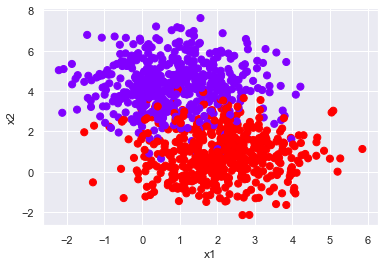

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Si queremos entrenar un árbol de decisión para clasificar nuestras instancias, primero debemos crear un objeto correspondiente al modelo. Este objeto será de de la clase `DecisionTreeClassifier`, la cual importamos desde la librería scikit-learn:

In [6]:
from sklearn.tree import DecisionTreeClassifier
# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=3)

Una vez que nuestro modelo fue creado, precisamos entrenarlo sobre nuestros datos. Esto lo logramos con el método `fit` que poseen todas las clases correspondientes a modelos de scikit-learn.

In [7]:
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

La función que definimos arriba nos permite explorar cómo es el dominio de decisión de nuestro arbol una vez que lo entrenamos.

<ipython-input-2-eb4d57bc559d>:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


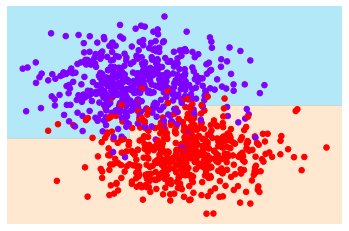

In [8]:
visualize_classifier(tree, X, y)

En este gráfico aquellos puntos (instancias) que queden sobre un fondo de su mismo color son aquellos que están bien clasificados por el modelo. Esto quiere decir que que si usamos el modelo para calificar su etiqueta 'y' a partir de sus coordenadas 'x1' y 'x2', este nos daría la misma etiqueta original del punto. 

En cambio, aquellos puntos que queda sobre un fondo de otro color son puntos para los cuales el modelo nos estaría dando una etiqueta distinta a la etiqueta original de esa instancia.

Nos podríamos preguntar luego: ¿cuál es el porcentaje de instancias bien clasificadas por el modelo?

Para responder esto usaremos el método `predict`. Este método nos indica la etiqueta asignada por el modelo a cada instancia del set de entrenamiento. Luego con la función `accuracy_score` podemos calcular el porcentaje de aciertos que obtenemos al comparar nuestra predicción `y_pred` contra la clase original `y`.

In [9]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
accuracy_score(y_pred,y)

0.936

**Para pensar y probar**:
1. ¿Qué ocurre si modifican el valor de `cluster_std` en la función `make_blobs`?¿En qué casos será más fácil - o difícil - la tarea de clasificación?
2. ¿Qué ocurre si modifican el valor de `centers` en la función `make_blobs`?¿En qué cambia la formulación del problema de clasificación?
3. Hay algunas características de esta formulación que tal vez les llamen la atención. En el caso binario, un problema de clasificación consiste en encontrar una **frontera** entre puntos que deje a un lado los que pertenecen a una clase, y del otro lado los puntos de la otra clase. Para convencerse (¡o no!):
    1. Elegir un problema de Clasificación Binario (al estilo Spam/No-Spam, Titanic Sobrevivió/No-Sobrevivió, etc.). Inventar - a mano - dos atributos, algunas instancias, y graficar. Luego, dibujar una frontera de decisión (siempre a mano, no tienen que programar). Un ejemplo podría ser: para clasificar vinos blancos y vinos tintos, un atributo podría ser el color y el otro podría ser el dulzor.
    2. ¿Qué ocurre si en lugar de dos atributos tenemos tres?¿Qué forma tendrá la frontera? Y si en vez de tres atributos tenemos cuatro?¿Se podrá visualizar?
    3. Para googlear (no hace falta hacerlo ahora): ¿Qué es la maldición de la dimensión/dimensionalidad (curse of dimensionality)?

1- si se aumenta el valor de cluster_std se solapan las muestras
2- si se aumenta el valor de centers se aumentan los grupos a clasificar

C-La maldición de la dimensionalidad se refiere a diversos fenómenos que surgen al analizar y organizar los datos en espacios de alta dimensión (a menudo con cientos o miles de dimensiones) que no se producen en los entornos de baja dimensionalidad, como el de tres dimensiones del espacio físico de la experiencia cotidiana. La expresión fue acuñada por Richard Bellman al considerar los problemas de optimización dinámica .

Hay múltiples fenómenos que se hace referencia por este nombre en dominios tales como el análisis numérico , toma de muestras , la combinatoria , el aprendizaje de máquina , la minería de datos y las bases de datos . El tema común de estos problemas es que cuando la dimensionalidad aumenta, el volumen de los aumentos espacio tan rápido que los datos disponibles se vuelven escasos. Esta escasez es problemático para cualquier método que requiere la significación estadística. Con el fin de obtener un resultado estadísticamente sólida y fiable, la cantidad de datos necesarios para apoyar el resultado a menudo crece exponencialmente con la dimensionalidad. Además, la organización y la búsqueda de datos a menudo se basa en la detección de áreas donde los objetos forman grupos con propiedades similares; en los datos de alta dimensión, sin embargo, todos los objetos parecen ser escasa y muy diferente en muchos aspectos, lo que impide estrategias de organización de datos común de ser eficiente

## Ejercicio - Dataset del Titanic


### Problema a resolver
El problema que nos planteamos es el siguiente: supongamos que tenemos el dataset de Titanic, donde conocemos varios datos de cada pasajero, incluído si sobrevivió o no al accidente. Pero nos dicen que se encontraron registros de nuevos pasajero, de los cuales se conocen todos los datos pero no saben si sobrevivieron. ¿Podremos generar un algoritmo que nos indique (en base a la información de los pasajeros que sí conocemos su estado) si esos otros pasajeros sobrevivieron o no?

Como ven este problema es de clasificación: tenemos que decidir la categoría (sobrevivió o no) de cada instancia en base a ciertos datos. 

## Preprocesamiento
A lo largo de la primera parte del curso, aprendimos a importar y limpiar nuesto dataset antes de empezar a analizarlo.

In [10]:
# Importamos el Dataset
df = pd.read_csv('DS_Clase_05_titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Para trabajar en este problema, vamos a quedarnos solo con algunos de los features disponibles en el dataset.

**Ejercicio**: descarte del dataset las columnas `Cabin`, `PassengerId`, `Name`, `Ticket`, `Embarked`.

In [13]:
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1,inplace=True)

**Ejercicio:** ¿Cuántas instancias con valores faltantes quedan? Descarte del Dataset dichas instancias.

In [14]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

**Ejercicio:** Note que de los features restantes, solo uno es de tipo categórico. ¿Cuál es? Use la función `LabelEncoder` de scikit-learn para cambiarlo a una variables numérica.

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


## Análisis exploratorio de datos

Muy bien, ahora tenemos un dataset reducido, sólo con features numéricos y sin valores faltantes. Recordemos que nuestro objetivo es predecir si un pasajero sobrevivió o no. Por ende nuestra columna objetivo será `Survived`.

El objetivo en esta pequeña exploración del dataset será saber cuales de los features (las columnas) serán de mayor utilidad para predecir si la persona sobrevivió o no.

Primero, vemos que porcentaje de pasajeros sobrevivió:

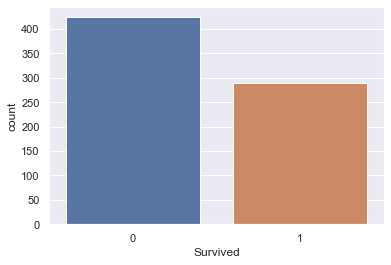

In [18]:
sns.countplot(x='Survived', data=df) #equivelante a sns.countplot(df.Sex)
plt.show()

In [19]:
df['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [20]:
# Calculamos el porcentaje numérico
cuenta_sobrevivientes = df['Survived'].value_counts()
porcentaje = 100*(cuenta_sobrevivientes.values[0]/df.shape[0])
print('Porcentaje de no sobrevivientes:',porcentaje)

Porcentaje de no sobrevivientes: 59.38375350140056


Tenemos que un 60% de los pasajeron no sobrevivieron. Es decir que, si ante la pregunta "¿Sobrevivió este pasajero?" nuestra respuesta fuese siempre "No", estaríamos acertando el 60% de las veces. Éste será nuestro Benchmark. Nuestro modelo tiene que, mínimamento, poder desempeñarse mejor que esto.

Vamos a explorar cuales de los features parecen que nos pueden ayudar a decidir mejor si un pasajero sobrevivió o no. Para empezar, vamos a implementar un Árbol de decisión que solo tendrá dos variables de entrada, por lo tanto debemos elegir las dos columnas que nos parezcan más adecuadas. Veamos como correlacionan las variables del dataset:

In [21]:
# No tocar este código
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

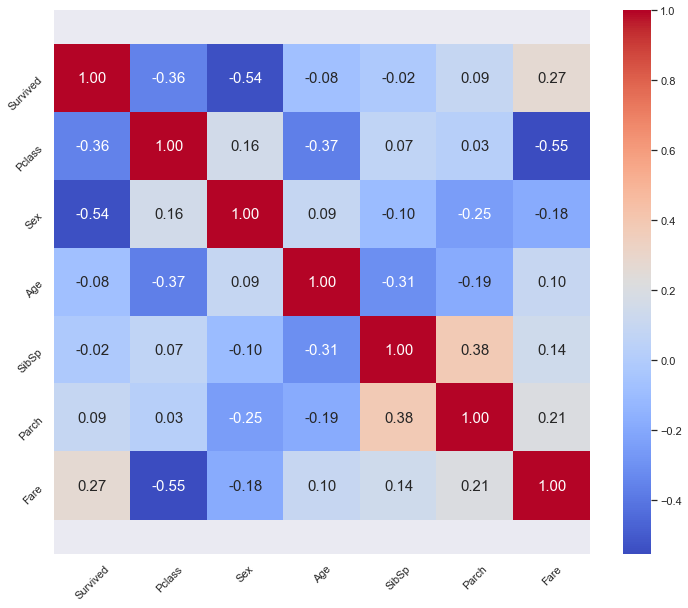

In [22]:
corr = df.corr()
plot_corre_heatmap(corr)

Mire con atención el gráfico anterior y recuerde que nuestra columna/fila a predecir es la primera ,`Survived`.

**Ejercicio:** ¿Cuáles dos columnas eligiría para usar como variables predictoras en el modelo? ¿Por qué?

## Entrenamiento del Modelo y evaluación

Veamos ahora que tan bien puede predecir el árbol de decisión sobre el dataset.

**Ejercicio**: Crear un objeto de la clase `DecisionTreeClassifier` (que importamos desde `sklearn.tree`):

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus
# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=3,random_state=42)
#tree = COMPLETAR()

**Ejercicio:** definir nuestras variables predictoras con las cuales vamos a entrenar el modelo, a las que llamaremos `x_train`. Usar las columas del dataset que elegimos del ejercicio anterior. 

In [24]:
X1 = df[['Sex','Pclass']]
print(X1)

     Sex  Pclass
0      1       3
1      0       1
2      0       3
3      0       1
4      1       3
..   ...     ...
885    0       3
886    1       2
887    0       1
889    1       1
890    1       3

[714 rows x 2 columns]


**Ejercicio:** definir el atributo objetivo que buscamos predecir. Lo llamaremos `y_train`:

In [25]:
y1= df['Survived']
print(y1)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print( y_train)
print(  y_test)

     Sex  Pclass
328    0       3
73     1       3
253    1       3
719    1       3
666    1       2
..   ...     ...
92     1       1
134    1       2
337    0       1
548    1       3
130    1       3

[571 rows x 2 columns]
     Sex  Pclass
149    1       2
407    1       2
53     0       2
369    0       1
818    1       3
..   ...     ...
819    1       3
164    1       3
363    1       3
56     0       2
136    0       1

[143 rows x 2 columns]
328    1
73     0
253    0
719    0
666    0
      ..
92     0
134    0
337    1
548    0
130    0
Name: Survived, Length: 571, dtype: int64
149    0
407    1
53     1
369    1
818    0
      ..
819    0
164    0
363    0
56     1
136    1
Name: Survived, Length: 143, dtype: int64


**Ejercicio:** entrenar el modelo.

In [27]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Nuestro árbol ya está entrenado. 

Ahora vamos a ver cuales son las etiquetas que el modelo le asigna a cada una de las instancias. Es decir vamos a pasarle al modelo el valor de `Pclass` y de `Sex`, y éste nos dirá si el pasajero sobrevivió o no (`y_pred`). Estas son las predicciones del modelo, pero nosotros conocemos además el verdadero paradero de estos pasajeros (son los valores de `y_train`). 

Comparando ambos valores (`y_pred` e `y_train`) podemos conocer el *accuracy* (porcentaje de aciertos) de nuestro modelo sobre el training set.

In [28]:
# Predecimos sobre nuestro set de entrenamieto
##y_pred = tree.predict(X_test)
y_pred = tree.predict(X_train)


In [29]:
from sklearn.metrics import accuracy_score

# Comaparamos con las etiquetas reales
#accuracy_score(COMPLETAR,COMPLETAR)
print("Accuracy:",accuracy_score(y_pred,  y_train))

Accuracy: 0.7915936952714536


**Hay que "tomar con pinzas" este rendimiento(79%), ya que se esta midiendo con el X_train y con este se ajustó el modelo, para mi sería más válido medir rendimientos con el X_test ( si se mide así da un rendimiento del 70%) y_pred = tree.predict(X_test)**

C:\Users\joseg\.conda\envs\datascience\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


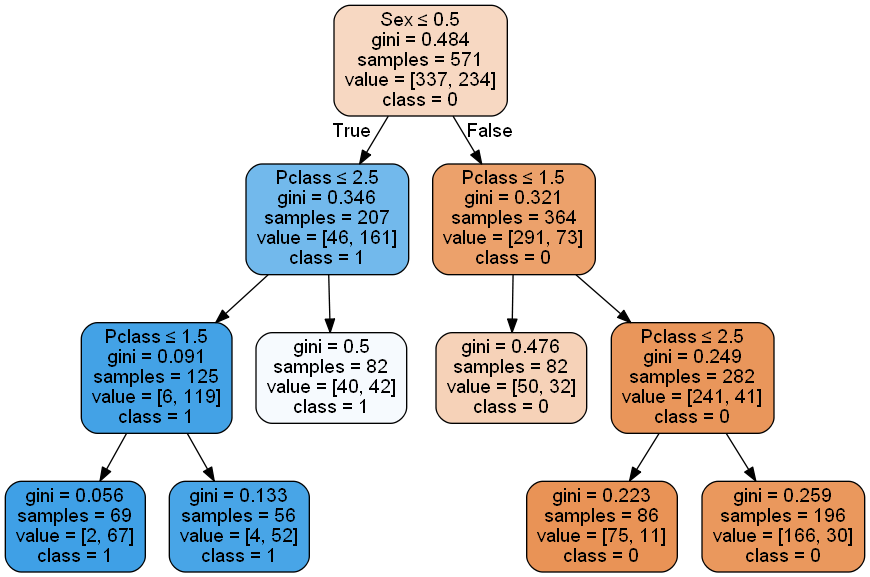

In [30]:

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =['Sex','Pclass'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('survived_titanic.png')
Image(graph.create_png())

Obtuvimos un 80%, apenas un 20% más que nuestro Benchmark.

Pongamos ahora toda la carne al asador, y pasémosle al modelo todos los datos que tenemos disponibles en el dataset, no sólo dos columnas. Veamos si esto mejora las predicciones del mismo.

In [31]:
x_train = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_train = df['Survived']

In [32]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [33]:
# Predecimos sobre nuestro set de entrenamieto
##y_pred = tree.predict(x_train)
y_pred = tree.predict(x_train)

# Comaparamos con las etiquetas reales
accuracy_score(y_train, y_pred)

0.8249299719887955

¡Ahora sí tenemos una mejora sustancial sobre nuestro Benchmark!

**Ejercicio:** Si bien parece que nuestro clasificador funciona muy bien prediciendo sobre el dataset de entrenamiento, 

* ¿Creen que lo haría igual sobre nuevos datos (pasajeros con los cuales no lo entrenamos)? ¿Esperarían que fuese mejor o peor el desempeño?

* Si uno quisiese tener una estiamación más certera sobre el rendimiento del modelo sobre nuevos datos ¿Qué se les ocurre que se podría hacer?

**Para tener una buena estimación hay que tomar los datos de X_test**

In [34]:
X_complete = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_complete = df['Survived']

In [35]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_complete,y_complete, test_size=0.2, random_state=42)

In [36]:
tree.fit(X_train_all,y_train_all)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [37]:
y_pred_all = tree.predict(X_test_all)

In [38]:
# Comaparamos con las etiquetas reales
accuracy_score(y_pred_all,y_test_all)

0.7412587412587412

*Este para mi seria una mejor aproximación de real eficiencia, 74% *

## Ensembles of Estimators: Random Forests

that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging. Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a random forest.

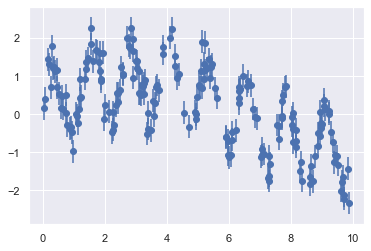

In [38]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');


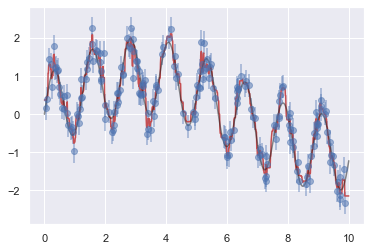

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);
